# The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
bank=pd.read_csv('C:/Users/user/Downloads/bank-full.csv', delimiter=';')

In [3]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Handling Outliers and Missing Values.
There is no missing value.
Four variables have outliers, which have been addressed by substituting the mean value.


In [6]:
def handle_outliers_zscore(bank, campaign, threshold=3):
    z_scores = (bank[campaign] - bank[campaign].mean()) / bank[campaign].std()  # Calculate z-scores
    outliers_indices = np.abs(z_scores) > threshold  # Identify outliers based on threshold
    bank.loc[outliers_indices, campaign] = bank[campaign].mean()
 

In [7]:
handle_outliers_zscore(bank, 'campaign')

In [8]:
def handle_outliers_zscore(bank, duration, threshold=3):
    z_scores = (bank[duration] - bank[duration].mean()) / bank[duration].std()  # Calculate z-scores
    outliers_indices = np.abs(z_scores) > threshold  # Identify outliers based on threshold
    bank.loc[outliers_indices, duration] = bank[duration].mean()

In [9]:
handle_outliers_zscore(bank, 'duration')

In [10]:
def handle_outliers_zscore(bank, pdays, threshold=3):
    z_scores = (bank[pdays] - bank[pdays].mean()) / bank[pdays].std()  # Calculate z-scores
    outliers_indices = np.abs(z_scores) > threshold  # Identify outliers based on threshold
    bank.loc[outliers_indices, pdays] = bank[pdays].mean()

In [11]:
handle_outliers_zscore(bank, 'pdays')

In [12]:
def handle_outliers_zscore(bank, previous, threshold=3):
    z_scores = (bank[previous] - bank[previous].mean()) / bank[previous].std()  # Calculate z-scores
    outliers_indices = np.abs(z_scores) > threshold  # Identify outliers based on threshold
    bank.loc[outliers_indices, previous] = bank[previous].mean()

In [13]:
handle_outliers_zscore(bank, 'previous')

# Exploratory data analysis

In [14]:
x=bank['marital']
y=bank['y']
pd.crosstab(x,y)

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [15]:
x=bank['contact']
y=bank['y']
pd.crosstab(x,y)

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


In [16]:
x = bank['marital']
y = bank['y']
z = bank['education']

pd.crosstab(columns=z, index=[x, y])


education     primary  secondary  tertiary  unknown
marital  y                                         
divorced no       648       2524      1268      145
         yes      104        291       203       24
married  no      4850      12466      6125     1018
         yes      396       1304       913      142
single   no       762       5762      3912      442
         yes       91        855       880       86

In [17]:
bank.pivot_table(index = 'marital' , columns = 'education' , values = 'y' , aggfunc = 'count')

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,752,2815,1471,169
married,5246,13770,7038,1160
single,853,6617,4792,528


In [18]:
x=bank['default']
y=bank['y']
pd.crosstab(x,y)

y,no,yes
default,,
no,39159,5237
yes,763,52


In [19]:
x=bank['housing']
y=bank['y']
pd.crosstab(x,y)

y,no,yes
housing,,
no,16727,3354
yes,23195,1935


In [20]:
x=bank['poutcome']
y=bank['y']
pd.crosstab(x,y)

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


# Findin Correlation between independent variables

In [21]:

bank[['balance', 'day', 'age']].corr()

,balance,day,age
balance,1.000000,0.004503,0.097783
day,0.004503,1.000000,-0.009120
age,0.097783,-0.009120,1.000000


In [22]:
bank[['pdays', 'duration', 'day']].corr()

,pdays,duration,day
pdays,1.000000,0.020053,-0.069939
duration,0.020053,1.000000,-0.034832
day,-0.069939,-0.034832,1.000000


In [23]:
bank[['campaign', 'previous', 'balance']].corr()

,campaign,previous,balance
campaign,1.000000,-0.064455,-0.011351
previous,-0.064455,1.000000,0.026338
balance,-0.011351,0.026338,1.000000


# Creating Binary variables

In [24]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
bank['y'] = bank['y'].replace({'no': 0, 'yes':1})

In [26]:
# total y yes 
bank['y'].sum()

5289

<AxesSubplot:ylabel='y'>

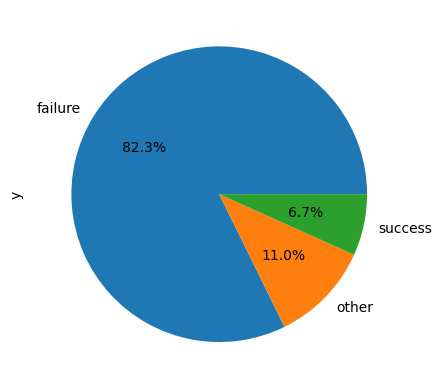

In [63]:
bank.groupby(['poutcome'])['y'].count().plot(kind='pie', autopct='%1.1f%%') 


In [30]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [31]:

bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [32]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [33]:
bank['default'] = bank['default'].replace({'no': 0, 'yes': 1})
bank['housing'] = bank['housing'].replace({'no': 0, 'yes': 1})
bank['loan'] = bank['loan'].replace({'no': 0, 'yes': 1})

# Data Visualization

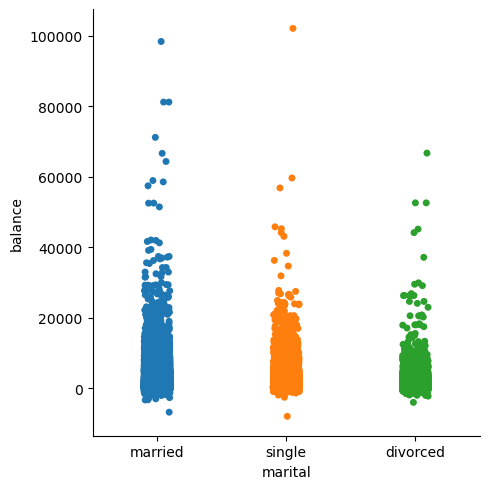

In [64]:
sns.catplot(x="marital", y="balance", data=bank)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'admin.'),
  Text(6, 0, 'services'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student')])

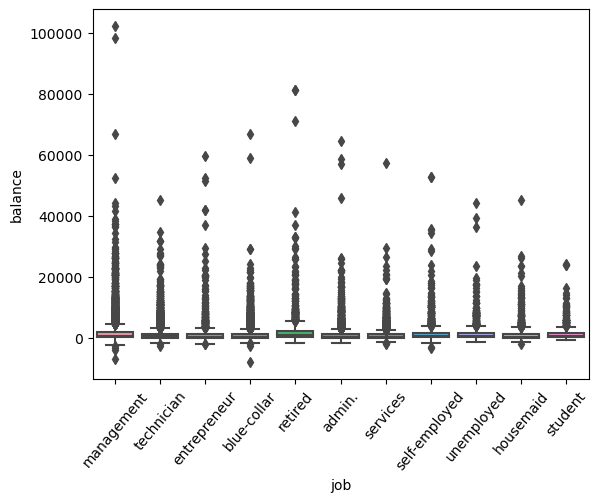

In [65]:
sns.boxplot(x='job',y='balance',data=bank)
plt.xticks(rotation=50)

<AxesSubplot:xlabel='age', ylabel='balance'>

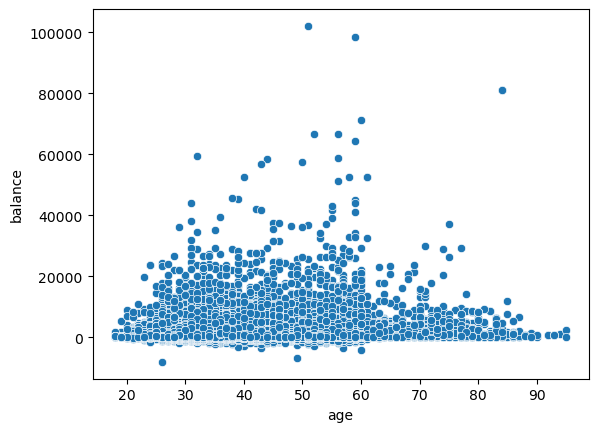

In [36]:
sns.scatterplot(x="age", y="balance", data=bank)

<AxesSubplot:ylabel='y'>

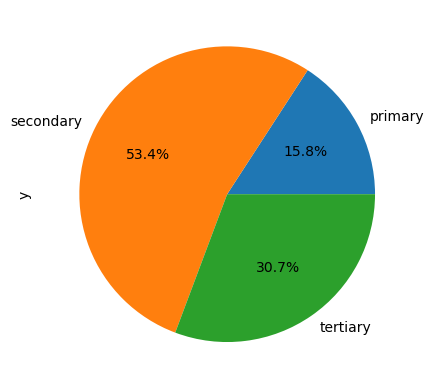

In [68]:
bank.groupby(['education'])['y'].count().plot(kind='pie', autopct='%1.1f%%') 

In [38]:
subscribed_data = bank[bank['y'] == 1]
not_subscribed_data = bank[bank['y'] == 0]

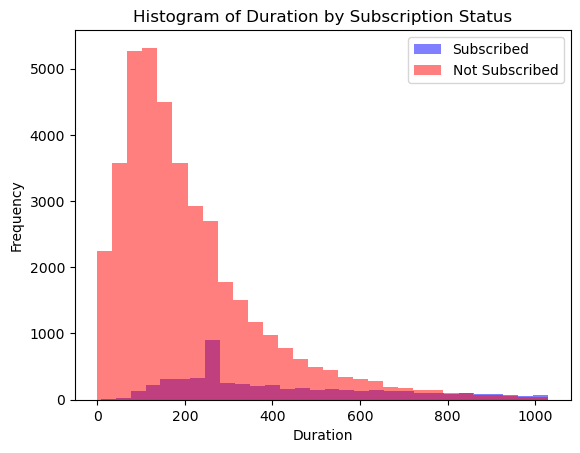

In [71]:
plt.hist(subscribed_data['duration'], bins=30, alpha=0.5, label='Subscribed', color='blue')
plt.hist(not_subscribed_data['duration'], bins=30, alpha=0.5, label='Not Subscribed', color='red')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration by Subscription Status')
plt.legend()
plt.show()

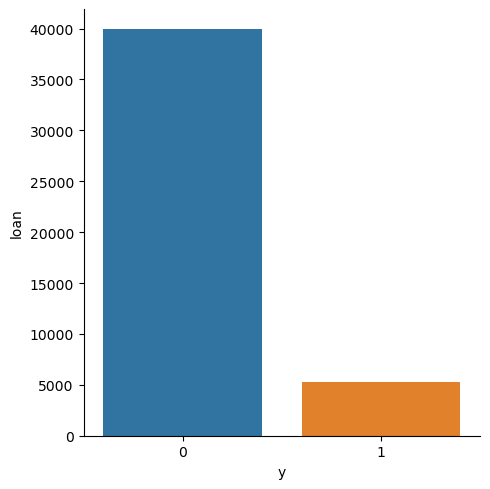

In [74]:
#Using .catplot() function and plotting a bar chart (Using Kind='Bar')
sns.catplot(x="y", y="loan", kind="bar", data = bank,estimator=len)

<AxesSubplot:xlabel='marital'>

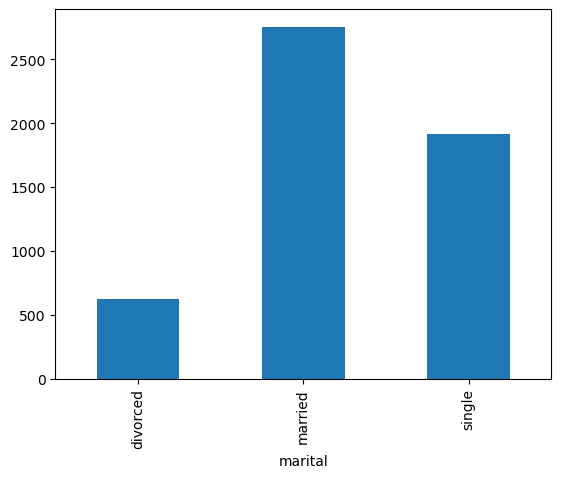

In [75]:
bank.groupby(['marital'])['y'].sum().plot(kind='bar')

<AxesSubplot:ylabel='job'>

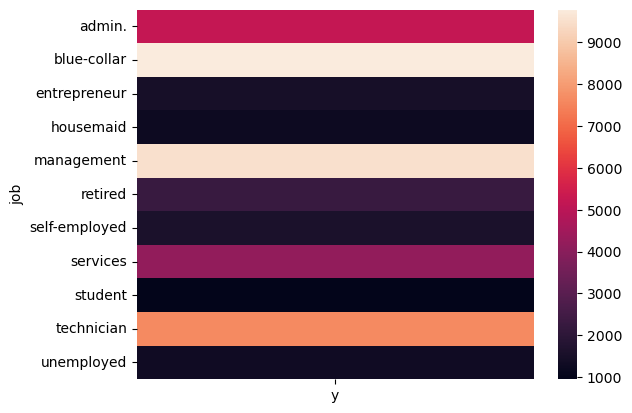

In [76]:
datamap=bank.pivot_table(index='job',values='y',aggfunc='count')
sns.heatmap(datamap)

# Data Preparation

In [43]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [44]:
bank['month'] = bank['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                                       'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})



In [45]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [46]:
bank['job'] = bank['job'].where(bank['job'] != 'unknown').ffill()

In [47]:
job_dummy=pd.get_dummies(bank['job'])
bank = pd.concat([bank, job_dummy], axis=1)

In [48]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [49]:
bank['education'] = bank['education'].where(bank['education'] != 'unknown').ffill()

In [50]:
edu_dummy=pd.get_dummies(bank['education'])
bank = pd.concat([bank, edu_dummy], axis=1)

In [51]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [52]:
bank['marital'] = bank['marital'].where(bank['marital'] != 'unknown').ffill()

In [53]:
marital_dummies=pd.get_dummies(bank['marital'])
bank = pd.concat([bank, marital_dummies], axis=1)

In [54]:
bank['contact'].unique()   

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [55]:
bank['contact'] = bank['contact'].where(bank['contact'] != 'unknown').bfill()

In [56]:
contact_dummy=pd.get_dummies(bank['contact'])
bank = pd.concat([bank, contact_dummy], axis=1)

In [57]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [58]:
bank['poutcome'] = bank['poutcome'].where(bank['poutcome'] != 'unknown').bfill()

In [59]:
poutcome_dummy=pd.get_dummies(bank['poutcome'])
bank = pd.concat([bank, poutcome_dummy], axis=1)

# Data View after Cleaning and preparation  

In [60]:
print(bank.describe() ) 

                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day         month      duration      campaign         pdays  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419      6.144655    234.316362      2.460278     27.155534   
std        8.322476      2.408034    188.6

In [410]:
bank.dtypes

age                int64
job               object
marital           object
education         object
default            int64
balance            int64
housing            int64
loan               int64
contact           object
day                int64
month              int64
duration         float64
campaign         float64
pdays            float64
previous         float64
poutcome          object
y                  int64
admin.             uint8
blue-collar        uint8
entrepreneur       uint8
housemaid          uint8
management         uint8
retired            uint8
self-employed      uint8
services           uint8
student            uint8
technician         uint8
unemployed         uint8
primary            uint8
secondary          uint8
tertiary           uint8
divorced           uint8
married            uint8
single             uint8
cellular           uint8
telephone          uint8
failure            uint8
other              uint8
success            uint8
dtype: object

# Define Predictors and outcome .Split Dataset 80-20 into train and testing  
 

In [411]:
# Base model 1
predictors = ['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'primary', 'secondary', 'tertiary', 'divorced', 'married', 'single', 'cellular', 'telephone','failure', 'other', 'success']
outcome = 'y'

In [312]:
#presonalised model 2
predictors = ['default', 'balance', 'housing', 'duration','loan', 'day','pdays', 'previous', 'admin.','entrepreneur','retired','blue-collar','management','technician','secondary', 'tertiary','married','single','cellular']
outcome = 'y'

In [412]:
# selected features  model 3
predictors = ['default', 'balance', 'day', 'month', 'duration', 'pdays', 'entrepreneur', 'housemaid', 'management' , 'retired', 'unemployed', 'secondary', 'success']
outcometcome = 'y'

In [413]:
X_train, X_test, y_train, y_test = train_test_split(bank[predictors], bank[outcome], test_size=0.8)


# Random Forest model 

In [414]:
Bankmodel = RandomForestClassifier()
Bankmodel.fit(X_train, y_train)

RandomForestClassifier()

In [415]:
y_pred = Bankmodel.predict(X_test)

In [416]:
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3161   29]
 [ 382   45]]


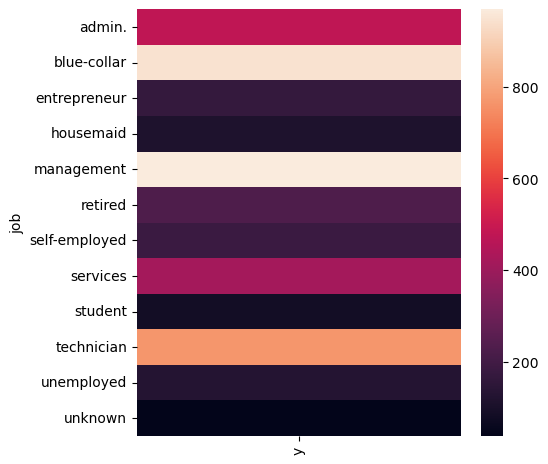

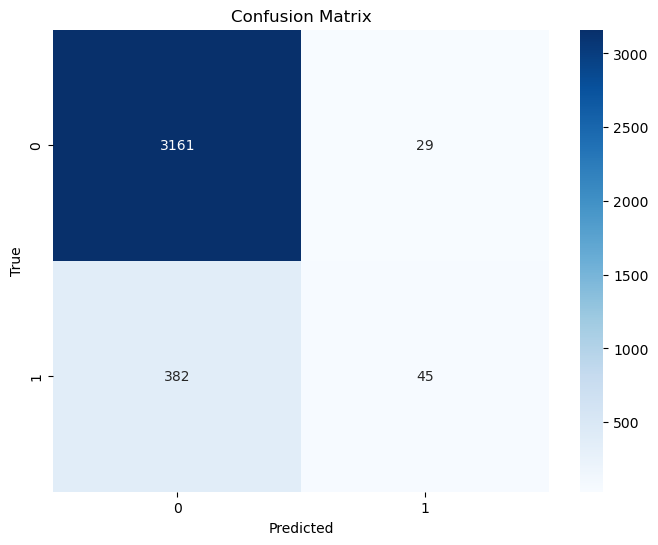

In [417]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [420]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8863699198230578
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3190
           1       0.61      0.11      0.18       427

    accuracy                           0.89      3617
   macro avg       0.75      0.55      0.56      3617
weighted avg       0.86      0.89      0.85      3617



# logistic model

In [206]:
logisticmodel = LogisticRegression()

In [207]:
logisticmodel.fit(X_train, y_train)

C:\Users\user\pragramfiles\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [208]:
y_pred2 = logisticmodel.predict(X_test)

In [209]:
cm = confusion_matrix(y_test, y_pred2)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[31309   636]
 [ 3471   753]]


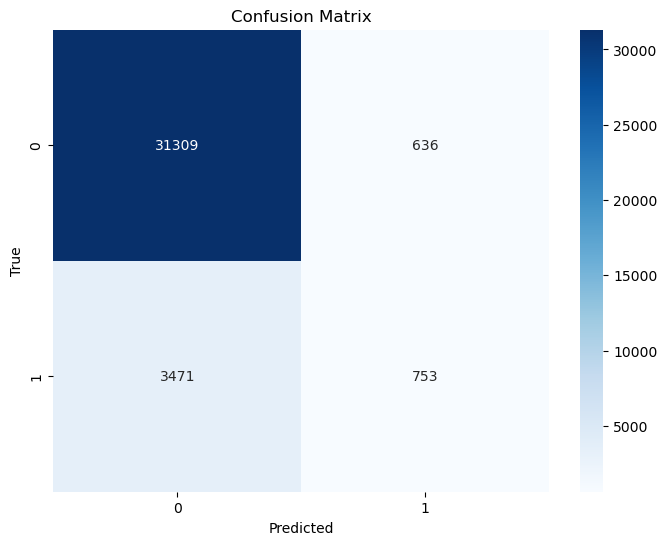

In [210]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [211]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.8864497221377423
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31945
           1       0.54      0.18      0.27      4224

    accuracy                           0.89     36169
   macro avg       0.72      0.58      0.60     36169
weighted avg       0.86      0.89      0.86     36169



# Cross validation of Models

In [224]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logisticmodel,X_train, y_train, cv=5, scoring='accuracy')

C:\Users\user\pragramfiles\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\pragramfiles\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [225]:
print("Mean accuracy:", scores.mean())

Mean accuracy: 0.8809998067675389


# System features selection code

In [214]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [215]:
#sfs = SFS(estimator=Bankmodel,k_features=(1, len(X_train.columns)),forward=True,scoring='accuracy',cv=5)


In [216]:
#sfs.fit(X_train, y_train)

# Get the selected feature indices
#selected_features = sfs.k_feature_idx_


In [217]:

# Print the selected features
#print("Selected features:", selected_features)

# ROC Chart

In [218]:
prob_rf = Bankmodel.predict_proba(X_test)[:, 1]
prob_lr = logisticmodel.predict_proba(X_test)[:, 1]

In [219]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, classification_report

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_rf)
auc_rf = roc_auc_score(y_test, prob_rf)


In [220]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, prob_lr)
auc_lr = roc_auc_score(y_test, prob_lr)

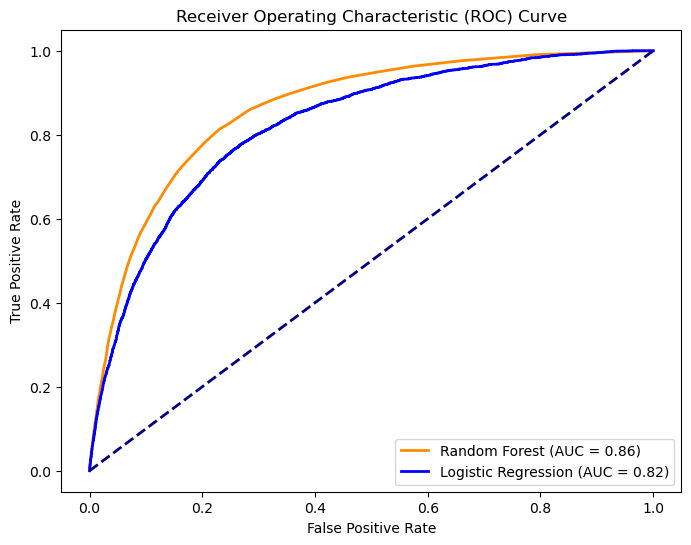

In [221]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Cummulative Gain chart 

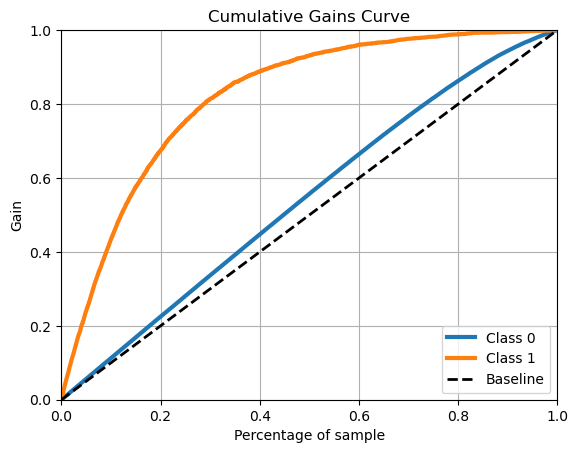

In [222]:
import scikitplot as skplt
prob_rf = Bankmodel.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, prob_rf)
plt.show()

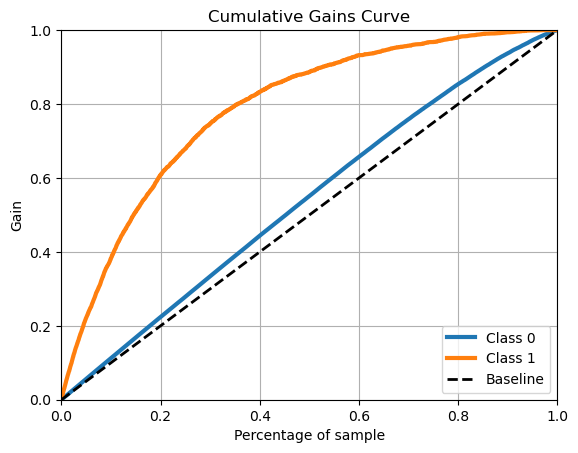

In [223]:
import scikitplot as skplt
prob_lf = logisticmodel.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, prob_lf)
plt.show()

# There are two models performing well,Random forest Model 1 and Model 3.The final model chosen is Random Forest Model 3, as its mean accuracy is higher than that of Model 1, and there is very little variation in its performance.